#### Carol Chiu
#### April 20, 2020
# Kmeans Clustering of Plutonium (PU) Isotope Composition

#####A power generator  company named RadioacX receives an assignment from NASA and SpaceX in which their recent rover project to Mars needs  a new  energy  supply. RadioacX currently  produces  the most powerful  energy  generators using  a chemical compound called plutonium (PU). The probblem is the device requires  a large amount of PU-239, the most popular isotope  in nuclear  reactions creating energy, and RadioacX is quickly running out of PU-239. However, they have a large supply of Plutonium including other isotopes not currently being used. They need to determine if there is any other isotope of PU is similar to PU-239 so that it could be used as a fuel instead so that they can still create an energy generator for NASA and SpaceX.

In [1]:
#Import Packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
%matplotlib inline 


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read in CSV File 
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv" 
df = pd.read_csv(csv_file) 
df.head() 

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


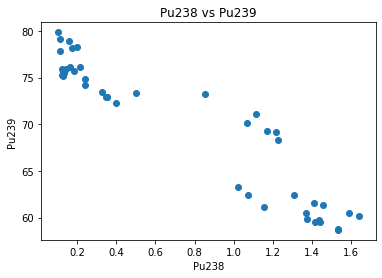

In [3]:
#Plot isotopes to see relationship 
plt.scatter(x = df['Pu238'], y = df['Pu239']);
plt.title("Pu238 vs Pu239")
plt.ylabel("Pu239")
plt.xlabel("Pu238");

In [5]:
#Scale and Run Kmeans Model 
X = df[['Pu238', 'Pu239']] 
sc = StandardScaler() 
X_sc = sc.fit_transform(X) 
km = KMeans(n_clusters=3) 
km.fit(X_sc)
df['cluster'] = km.labels_ 

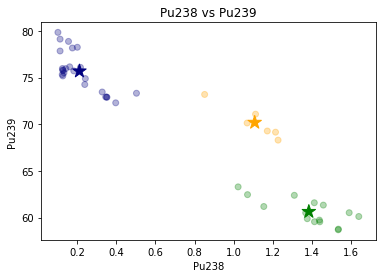

In [6]:
#Plot clusters  
def plot_clusters(df):     
    color_dict = {0: 'navy', 1: 'green', 2: 'orange'}     
    centroids = df.groupby('cluster').mean()     
    df['cluster_color'] = df['cluster'].map(color_dict)     
    centroids['cluster_color'] = centroids.index.map(color_dict)     
    plt.scatter(df['Pu238'], df['Pu239'], color=df['cluster_color'], alpha=0.3)     
    plt.scatter(centroids['Pu238'], centroids['Pu239'], color=centroids['cluster_color'], marker='*', s=200) 
    plt.title("Pu238 vs Pu239")
    plt.ylabel("Pu239")
    plt.xlabel("Pu238")
plot_clusters(df)

In [7]:
#Compare silhouette score 
sil = silhouette_score(X_sc, km.labels_) 
print("Silhouette score for Pu-238 and Pu-239 is",sil)

Silhouette score for Pu-238 and Pu-239 is 0.7138299182180218


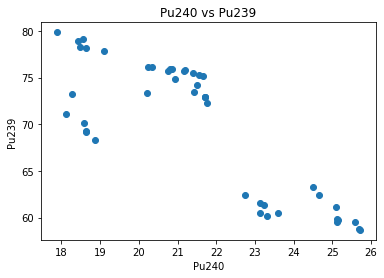

In [8]:
#Plot isotopes to see relationship 
X = df[['Pu240', 'Pu239']] 
plt.scatter(x = df['Pu240'], y = df['Pu239']);
plt.title("Pu240 vs Pu239")
plt.ylabel("Pu239")
plt.xlabel("Pu240");

In [9]:
#Scale and Run Kmeans Model 
sc = StandardScaler() 
X_sc = sc.fit_transform(X) 
km = KMeans(n_clusters=3) 
km.fit(X_sc)
df['cluster'] = km.labels_ 

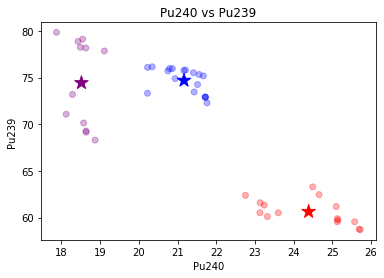

In [10]:
#Plot clusters  
def plot_clusters(df):     
    color_dict = {0: 'blue', 1: 'red', 2: 'purple'}     
    centroids = df.groupby('cluster').mean()     
    df['cluster_color'] = df['cluster'].map(color_dict)     
    centroids['cluster_color'] = centroids.index.map(color_dict)     
    plt.scatter(df['Pu240'], df['Pu239'], color=df['cluster_color'], alpha=0.3)     
    plt.scatter(centroids['Pu240'], centroids['Pu239'], color=centroids['cluster_color'], marker='*', s=200) 
    plt.title("Pu240 vs Pu239")
    plt.ylabel("Pu239")
    plt.xlabel("Pu240")
plot_clusters(df)

In [11]:
#Compare silhouette score 
sil = silhouette_score(X_sc, km.labels_) 
print("Silhouette score for Pu-240 and Pu-239 is",sil)

Silhouette score for Pu-240 and Pu-239 is 0.633217477686232


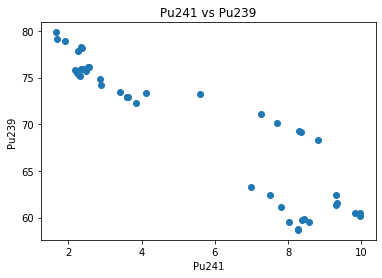

In [12]:
#Plot isotopes to see relationship 
X = df[['Pu241', 'Pu239']] 
plt.scatter(x = df['Pu241'], y = df['Pu239']);
plt.title("Pu241 vs Pu239")
plt.ylabel("Pu239")
plt.xlabel("Pu241");

In [13]:
#Scale and Run Kmeans Model 
sc = StandardScaler() 
X_sc = sc.fit_transform(X) 
km = KMeans(n_clusters=3) 
km.fit(X_sc)
df['cluster'] = km.labels_

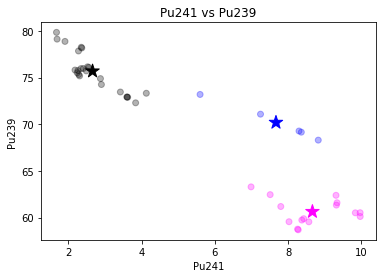

In [18]:
#Plot clusters  
def plot_clusters(df):     
    color_dict = {0: 'magenta', 1: 'black', 2: 'blue'}     
    centroids = df.groupby('cluster').mean()     
    df['cluster_color'] = df['cluster'].map(color_dict)     
    centroids['cluster_color'] = centroids.index.map(color_dict)     
    plt.scatter(df['Pu241'], df['Pu239'], color=df['cluster_color'], alpha=0.3)     
    plt.scatter(centroids['Pu241'], centroids['Pu239'], color=centroids['cluster_color'], marker='*', s=200) 
    plt.title("Pu241 vs Pu239")
    plt.ylabel("Pu239")
    plt.xlabel("Pu241")
plot_clusters(df)

In [15]:
#Compare silhouette score 
sil = silhouette_score(X_sc, km.labels_) 
print("Silhouette score for Pu-241 and Pu-239 is",sil)

Silhouette score for Pu-241 and Pu-239 is 0.6985505682786127


######Results/Summary: Pu-238 and Pu-241 appear to be the closest in space to Pu-239. Also, they have the lowest silhouette scores, meaning they are not as easily separable from Pu-239 which we want because we want them to be as similar as possible.